### LIBRARY

In [1]:
import sys
print(sys.executable)

C:\Users\sajjaduddin.mahmud\.conda\envs\climada_env\python.exe


In [2]:
import climada

In [1]:
import geopandas as gpd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
import math
from copy import deepcopy
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.lines import Line2D
import geopy.distance
from scipy import stats
from scipy.integrate import quad
import seaborn as sns
import random
import elevation
import os
import json
import imageio
import pdb
from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh


# climada libraries
from climada.hazard import TCTracks
from climada.hazard import TropCyclone, Centroids

ModuleNotFoundError: No module named 'geopandas'

### USER INPUT

In [2]:
# HURRICANE INFORMATION FROM IBTrACS
data_provider = 'usa'
hurricane_id = '2017228N14314'          # Storm ID from IBTrACS; This is the ID for Hurricane Harvey (2017)
hurricane_name = 'Hurricane Harvey'
time_report = 2                         # The hours of time stamps i.e. data is provided for every "time_report" hours

# WINDFIELD GENERATION FROM CLIMADA
min_lat, max_lat = 25, 37               # Min and max lattitude for the centroids raster of climada
min_lon, max_lon = -108, -92.5          # Min and max longitude for the centroids raster of climada
centroid_resolution = 0.05              # Resolution for centroids (Hint: lower the better but takes more computation)
intensity_threshold = 0                 # define threshold to compute intensities (eg. 10 means windspeed < 10 is considered as 0)
store_windfields = False                # Boolean value that determines if one needs to save windfield vector (returns csr sparse matrix) and can be accessed by "windfields" method 


# SYNTHETIC TRACK CONFIGURAION
synthetic_track_numbers = 5             # Number of ensemble members per track; Default: 9

# CLIMATE CHANGE SCENARIO
reference_year = 2055                   # Year between 2000 and 2100; default: 2050
rcp_scenario = 45                       # 6 for RCP 2.6, 45 for RCP 4.5, 60 for RCP 6.0 and 85 for RCP 8.5; default: 45


### HURRICANE ANALYSIS AND TRACK GENERATION FROM CLIMADA

2023-06-06 21:07:51,947 - climada.hazard.tc_tracks - WARNING - The cached IBTrACS data set dates from 2022-11-01 17:02:03 (older than 180 days). Very likely, a more recent version is available. Consider manually removing the file C:\Users\sajjaduddin.mahmud\climada\data\IBTrACS.ALL.v04r00.nc and re-running this function, which will download the most recent version of the IBTrACS data set from the official URL.


Text(0.5, 1.0, 'Hurricane Harvey')

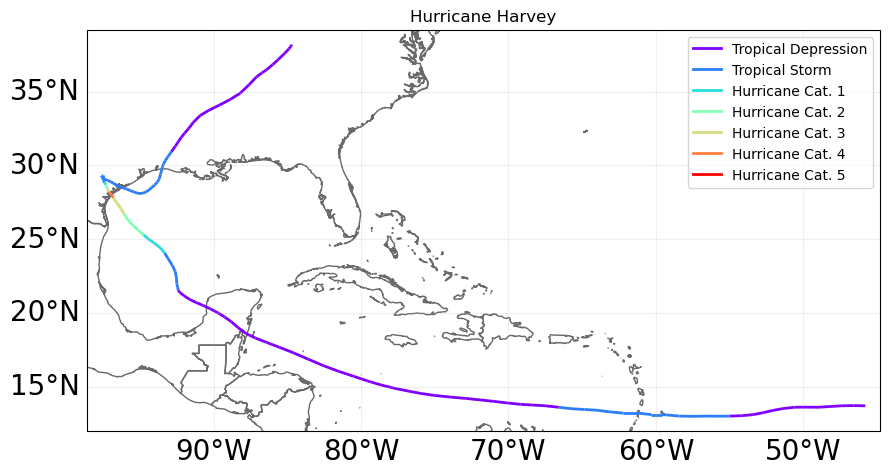

In [3]:
# Loading Track Information
hurricane_track = TCTracks.from_ibtracs_netcdf(provider = data_provider, storm_id = hurricane_id) 

# Plotting Hurricane Track
hurricane_track_plot = hurricane_track.plot();
hurricane_track_plot.set_title(hurricane_name) # Plot Title

In [7]:
# Data under Hurricane Track
Hurricane_Data = hurricane_track.get_track(hurricane_id)
Hurricane_Data

<xarray.Dataset>
Dimensions:                 (time: 141)
Coordinates:
  * time                    (time) datetime64[ns] 2017-08-16T06:00:00 ... 201...
    lat                     (time) float32 13.7 13.71 13.7 ... 37.9 38.09 38.2
    lon                     (time) float32 -45.8 -46.6 -47.4 ... -84.75 -84.7
Data variables:
    time_step               (time) float64 3.0 3.0 3.0 3.0 ... 3.0 3.0 3.0 3.0
    radius_max_wind         (time) float32 80.0 80.0 80.0 ... 80.0 80.0 80.0
    radius_oci              (time) float32 150.0 150.0 150.0 ... 220.0 220.0
    max_sustained_wind      (time) float32 25.0 25.0 25.0 ... 20.0 17.0 15.0
    central_pressure        (time) float32 1.013e+03 1.011e+03 ... 1.013e+03
    environmental_pressure  (time) float64 1.013e+03 1.013e+03 ... 1.013e+03
    basin                   (time) <U2 'NA' 'NA' 'NA' 'NA' ... 'NA' 'NA' 'NA'
Attributes:
    max_sustained_wind_unit:  kn
    central_pressure_unit:    mb
    name:                     HARVEY
    sid:                      2017228N14314
    orig_event_flag:          True
    data_provider:            ibtracs_usa
    id_no:                    2017228014314.0
    category:                 4

In [8]:
type(Hurricane_Data)


xarray.core.dataset.Dataset

<GeoAxesSubplot:>

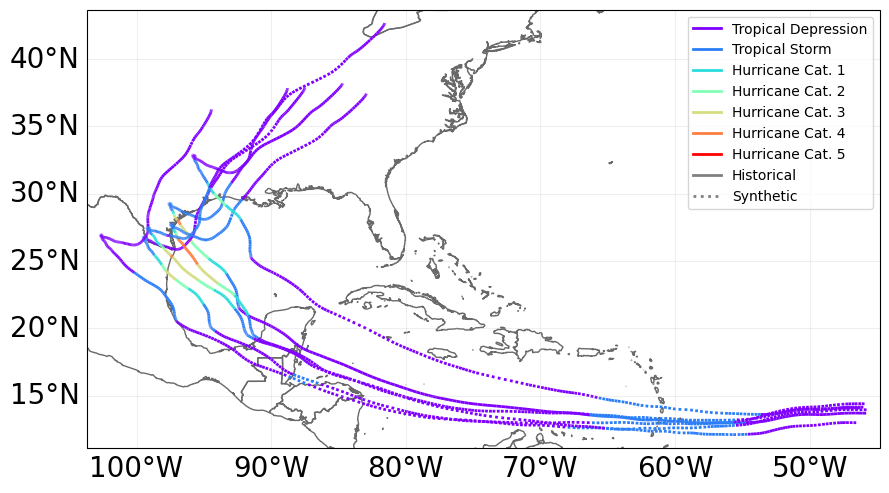

In [6]:
# Generating Synthetic Tracks

# Configuration for All Synthetic Track at the Same Temporal Resolution
hurricane_track.equal_timestep()

# Generating Synthetic Tracks
hurricane_track.calc_perturbed_trajectories(nb_synth_tracks = synthetic_track_numbers)

# Plotting Hurricane Original and Synthetic Tracks
hurricane_track.plot()


In [17]:
hurricane_track.data[-1]

<xarray.Dataset>
Dimensions:                 (time: 415)
Coordinates:
  * time                    (time) datetime64[ns] 2017-08-16T06:00:00 ... 201...
    lon                     (time) float64 -46.54 -46.81 ... -88.79 -88.79
    lat                     (time) float64 12.99 13.0 13.01 ... 37.82 37.86
Data variables:
    time_step               (time) float64 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    radius_max_wind         (time) float64 80.0 80.0 80.0 ... 80.0 80.0 80.0
    radius_oci              (time) float64 150.0 150.0 150.0 ... 220.0 220.0
    max_sustained_wind      (time) float64 25.0 25.0 25.0 ... 6.204 6.149 6.102
    central_pressure        (time) float64 1.013e+03 1.012e+03 ... 1.012e+03
    environmental_pressure  (time) float64 1.013e+03 1.013e+03 ... 1.013e+03
    basin                   (time) <U2 'NA' 'NA' 'NA' 'NA' ... 'NA' 'NA' 'NA'
    on_land                 (time) bool False False False ... True True True
    dist_since_lf           (time) float64 nan nan nan ... 1.092e+03 1.096e+03
Attributes:
    max_sustained_wind_unit:  kn
    central_pressure_unit:    mb
    name:                     HARVEY_gen5
    sid:                      2017228N14314_gen5
    orig_event_flag:          False
    data_provider:            ibtracs_usa
    id_no:                    2017228014314.05
    category:                 4

<GeoAxesSubplot:title={'center':'Event ID 1: 2017228N14314'}>

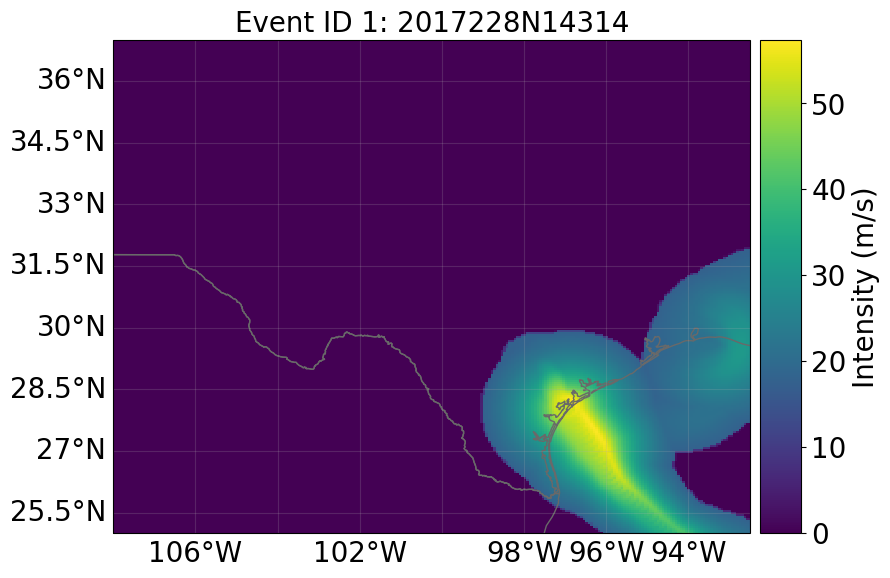

In [8]:
# CENTROID CONSTRUCTION
centroid = Centroids.from_pnt_bounds((min_lon, min_lat, max_lon, max_lat), res = centroid_resolution)

hurricane_track = TropCyclone.from_tracks(hurricane_track, centroids = centroid)
hurricane_track.check()
hurricane_track.plot_intensity(hurricane_id)



<GeoAxesSubplot:title={'center':'Event ID 1: 2017228N14314'}>

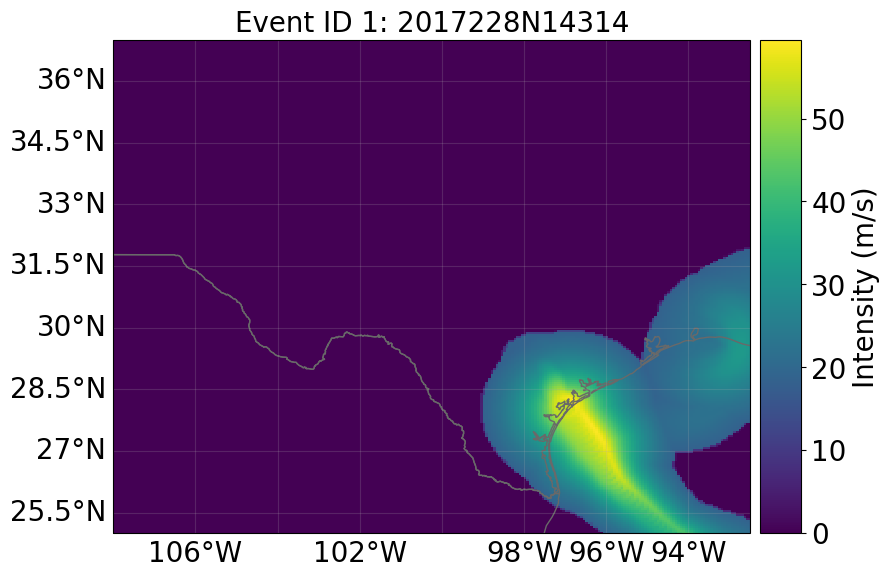

In [11]:
# APPLYING CLIMATE CHANGE SCENARIOS
hurricane_track_climatechange = hurricane_track.apply_climate_scenario_knu(ref_year = reference_year, rcp_scenario = rcp_scenario)
hurricane_track_climatechange.plot_intensity(hurricane_id)


